In [48]:
from scipy import stats

In [37]:
import pandas as pd

df = pd.read_csv('archive/Childhood malnutrition.csv')
df.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,53.2,44.9,18.2
1,Afghanistan,AFG,2004,59.3,32.9,8.6
2,Afghanistan,AFG,2013,40.4,24.6,9.5
3,Afghanistan,AFG,2018,38.2,19.1,5.1
4,Albania,ALB,1997,20.4,7.1,8.1


In [53]:
df.size

6419

In [38]:
import numpy as np
import pycountry
# pip install pycountry-convert
import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

def get_continent(x):
    try:
        # Get from alpha_3
        return continents[pc.country_alpha2_to_continent_code(pycountry.countries.get(alpha_3=x).alpha_2)]
    except:
        return np.nan

In [39]:
df['Continent'] = df['Code'].apply(get_continent)

In [40]:
get_continent('AFG')

'Asia'

In [41]:
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent
780,Timor,TLS,2002,55.7,40.6,13.7,NaN
781,Timor,TLS,2003,54.8,41.5,14.3,NaN
782,Timor,TLS,2007,57.2,49.5,21.3,NaN
783,Timor,TLS,2009,57.5,44.9,18.9,NaN
784,Timor,TLS,2013,51.7,37.5,9.9,NaN


In [42]:
# Manually Adding a Continent for Timor
df['Continent'] = df['Continent'].replace(np.nan, 'Asia')

In [43]:
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent


In [44]:
df.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent
0,Afghanistan,AFG,1997,53.2,44.9,18.2,Asia
1,Afghanistan,AFG,2004,59.3,32.9,8.6,Asia
2,Afghanistan,AFG,2013,40.4,24.6,9.5,Asia
3,Afghanistan,AFG,2018,38.2,19.1,5.1,Asia
4,Albania,ALB,1997,20.4,7.1,8.1,Europe


In [45]:
df.rename(columns={"Prevalence of stunting, height for age (% of children under 5)": "Stunting","Prevalence of underweight, weight for age (% of children under 5)" : "Underweight","Prevalence of wasting, weight for height (% of children under 5)" : "Wasting"},inplace=True)


In [46]:
df.head()

,Entity,Code,Year,Stunting,Underweight,Wasting,Continent
0,Afghanistan,AFG,1997,53.2,44.9,18.2,Asia
1,Afghanistan,AFG,2004,59.3,32.9,8.6,Asia
2,Afghanistan,AFG,2013,40.4,24.6,9.5,Asia
3,Afghanistan,AFG,2018,38.2,19.1,5.1,Asia
4,Albania,ALB,1997,20.4,7.1,8.1,Europe


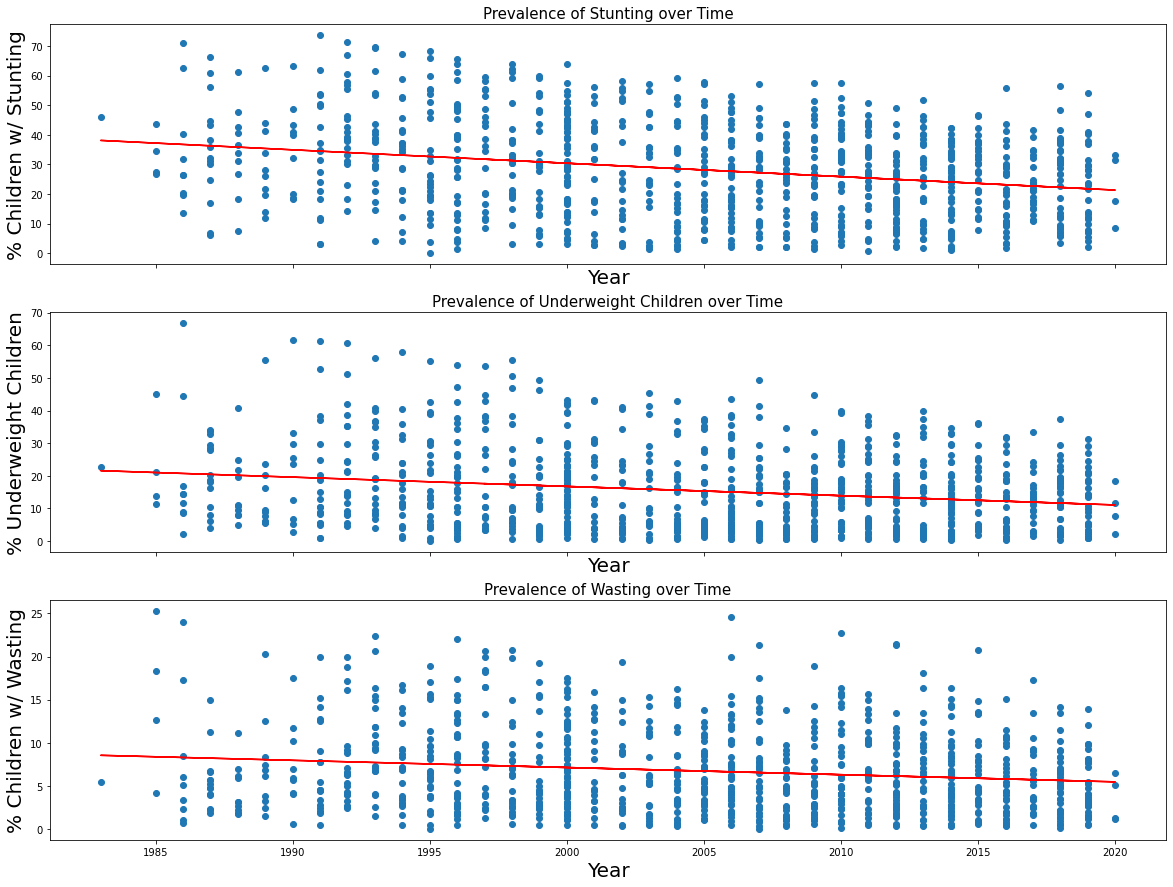

In [52]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True)


axs[0].scatter(df['Year'], df['Stunting'])
axs[0].set_title('Prevalence of Stunting over Time', fontsize=15)
axs[0].set_xlabel("Year", fontsize=20)
axs[0].set_ylabel("% Children w/ Stunting", fontsize=20)
res = stats.linregress(df['Year'], df['Stunting']) 
axs[0].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')


axs[1].scatter(df['Year'], df['Underweight'])
axs[1].set_title('Prevalence of Underweight Children over Time', fontsize=15)
axs[1].set_xlabel("Year", fontsize=20)
axs[1].set_ylabel("% Underweight Children" , fontsize=20)
res = stats.linregress(df['Year'], df['Underweight']) 
axs[1].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')

axs[2].scatter(df['Year'], df['Wasting'])
axs[2].set_title('Prevalence of Wasting over Time', fontsize=15)
axs[2].set_xlabel("Year", fontsize=20)
axs[2].set_ylabel("% Children w/ Wasting", fontsize=20)
res = stats.linregress(df['Year'], df['Wasting']) 
axs[2].plot(df['Year'], res.intercept + res.slope*df['Year'], 'r')

plt.show()

General decrease in attributes that make up malnutrition (stunting, underweight, wasting) over time. However, slope not that steep, so we see that it is still a big problem in the world today. 